In [120]:
import matplotlib.pyplot as plt
from addict import Dict
import json

file_train = open('./data/sg_train_annotations.json')
train_annotations = [Dict(json) for json in json.load(file_train)]
file_train.close()

file_test = open('./data/sg_test_annotations.json')
test_annotations = [Dict(json) for json in json.load(file_test)]
file_test.close()

In [126]:
test_annotations[0].relationships[0]

{'text': ['woman', 'wears', 'shirt'],
 'objects': [0, 1],
 'relationship': 'wearing'}

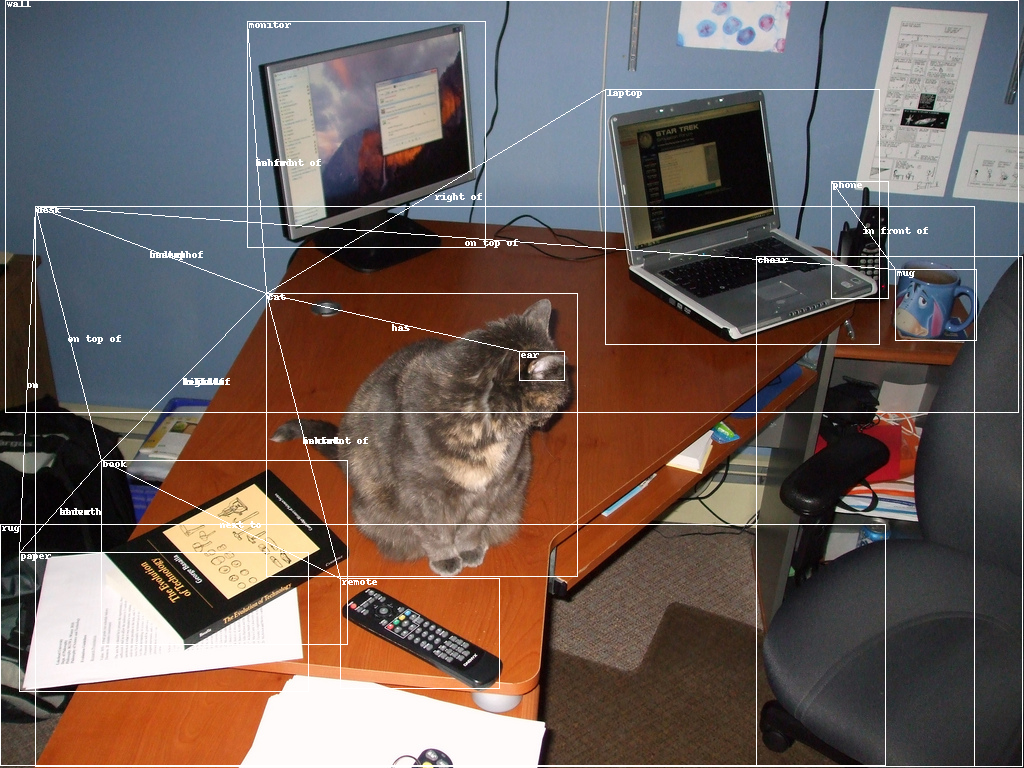

In [168]:
import random
from PIL import Image, ImageDraw

annotation = random.choice(train_annotations)
img = Image.open('./data/train/'+annotation.filename).convert('RGBA')

img_annotations = Image.new('RGBA', img.size, (255,255,255,0))
d = ImageDraw.Draw(img_annotations)

def bbox_to_points(bbox):
    return [bbox.x, bbox.y, bbox.x + bbox.w, bbox.y + bbox.h]

for obj in annotation.objects:
    bbox = obj.bbox
    d.rectangle(bbox_to_points(bbox))
    d.text([bbox.x + 2, bbox.y - 2], '/'.join(obj.names))

for relationship in annotation.relationships:
    subj, obj = relationship.objects
    relationship_txt = relationship.relationship
    subj_point = (annotation.objects[subj].bbox.x, annotation.objects[subj].bbox.y)
    obj_point = (annotation.objects[obj].bbox.x, annotation.objects[obj].bbox.y)
    d.line([subj_point, obj_point], width=1)
    d.text([(subj_point[0] + obj_point[0]) / 2, (subj_point[1] + obj_point[1]) / 2], relationship_txt)
    
Image.alpha_composite(img, img_annotations)